In [31]:
#módulos que precisamos nesta aula (class 1/2)
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage import io
%matplotlib inline

In [32]:
# Local de config:
grnscr = "liveruanfelipereaction.jpeg" #Link da imagem com o fundo verde.
alvo = "sandworm.jpeg"

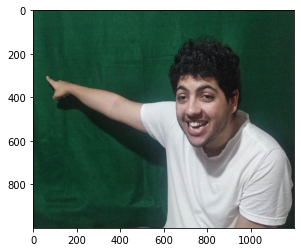

In [33]:
#Primeiro, abrimos a imagem
img = io.imread(grnscr)
img2 = cv2.resize(img,(1200,1000))
img2 = cv2.flip(img2,1)
plt.imshow(img2)

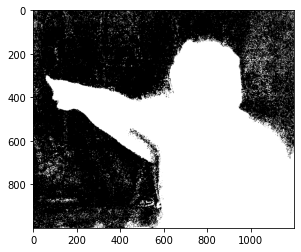

In [34]:
#Em seguida, façamos uma másara dentro dos locais "verdes" na imagem
vdar = np.array([0,43,33])
vlig  = np.array([30,165,140])
mask = cv2.inRange(img2, vdar, vlig)
mask = cv2.bitwise_not(mask,mask)
plt.imshow(mask, cmap='gray')

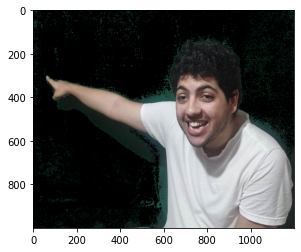

In [35]:
#Aplicamos a máscara a imagem original.
fg = cv2.bitwise_or (img2,img2,mask = mask)
plt.imshow(fg)

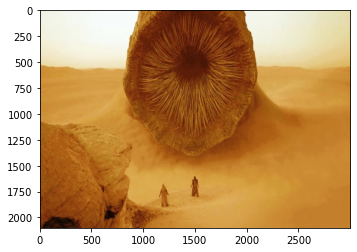

In [36]:
#Agora, abrimos a imagem alvo:
imga = io.imread(alvo)
imga2 = cv2.flip(imga,1)
imga2 = cv2.resize(imga2,(3000,2100))
plt.imshow(imga2)

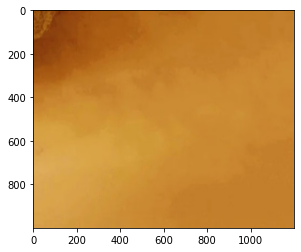

In [37]:
#Selecionamos uma região de interesse.
limx = imga2.shape[0]
limy = imga2.shape[1]
roi = imga2[limx-img2.shape[0]:limx,limy-img2.shape[1]:limy]
plt.imshow(roi)

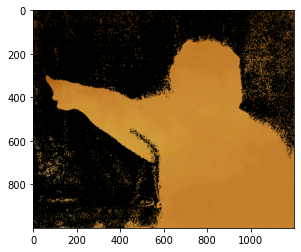

In [38]:
#Recortamos, usando a mascara, a região que vai ser substituida
clone = roi.copy()
clone[mask == 0] = [0,0,0]
plt.imshow(clone)

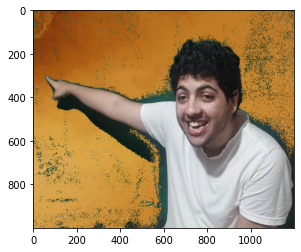

In [39]:
# Finalmente, removemos a parte a ser removida, e adicionamos a parte que queriamos substituir
final = roi - clone + fg
plt.imshow(final)

True

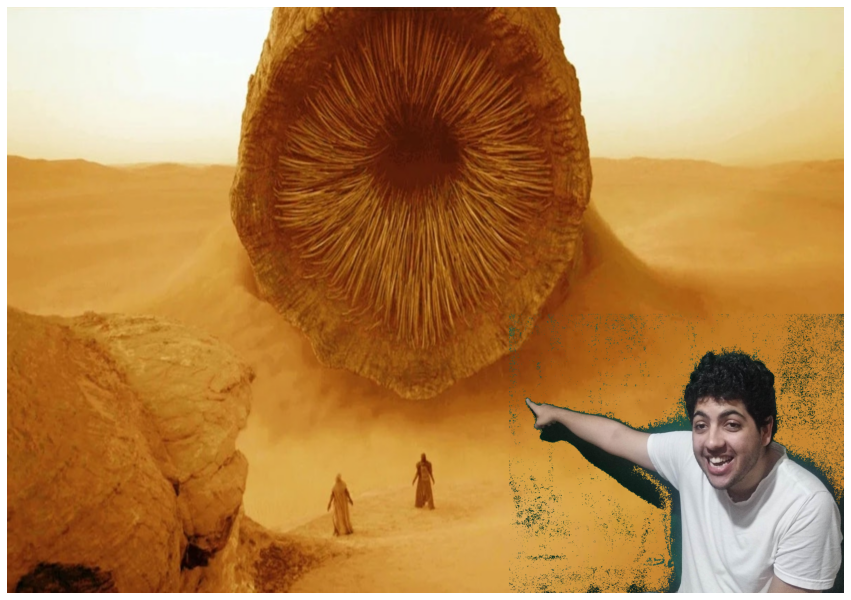

In [40]:
#substituimos na imagem original e printamos o resultado. Convertemos as cores, e salvamos o resultado
imga2[limx-img2.shape[0]:limx,limy-img2.shape[1]:limy] = final
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(imga2)
ax.axis('off')
imga2 = cv2.cvtColor(imga2, cv2.COLOR_BGR2RGB)
cv2.imwrite('resfin.jpeg' , imga2)    